# CSV

In [1]:
import pandas as pd

df = pd.read_csv("Bitcoin Historical Data - Investing.com.csv", delimiter = ",", parse_dates=['Date'], index_col='Date')
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-02-11,"21,649.4","21,767.4","21,627.6","21,760.0",0,0
2023-02-10,"21,819.0","21,941.1","21,539.3","21,651.1",0,0
2023-02-09,"22,946.5","22,996.4","21,773.9","21,819.0",0,0
2023-02-08,"23,263.4","23,367.9","22,731.1","22,939.4",0,0
2023-02-07,"22,757.2","23,310.9","22,756.2","23,264.2",0,0
...,...,...,...,...,...,...
2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%
2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%


In [66]:
# df = df[df.index < pd.to_datetime("2010-07-21")]
# df

In [2]:
df.dtypes

Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [3]:
#df = df[["Price"]].copy()

df.rename(columns={"Price": "price"}, inplace=True)

# Parse comma-separated number into float
df["price"] = df["price"].apply(lambda x: float(x.replace(',', '')))

df

,price
Date,
2023-02-11,21649.4
2023-02-10,21819.0
2023-02-09,22946.5
2023-02-08,23263.4
2023-02-07,22757.2
...,...
2010-07-22,0.1
2010-07-21,0.1
2010-07-20,0.1


Dando la vuelta a un dataframe, colocando la primera fila en la última y viceversa. Esto es una forma de invertir el orden de las filas de un DataFrame de pandas.

df.iloc es una forma de acceder a las filas de un DataFrame utilizando índices enteros. El argumento [::-1] es una notación de slicing de Python que indica que se deben seleccionar todas las filas, pero en orden inverso.

La función copy se utiliza para crear una copia independiente del DataFrame original, para evitar la asignación por referencia. Sin la función copy, el nuevo DataFrame (df) estaría enlazado al original y cualquier modificación realizada en uno de ellos afectaría al otro.

In [4]:
# Orden inverso utilizando slicing
df = df.iloc[::-1].copy()
df

,price
Date,
2010-07-18,0.1
2010-07-19,0.1
2010-07-20,0.1
2010-07-21,0.1
2010-07-22,0.1
...,...
2023-02-07,22757.2
2023-02-08,23263.4
2023-02-09,22946.5


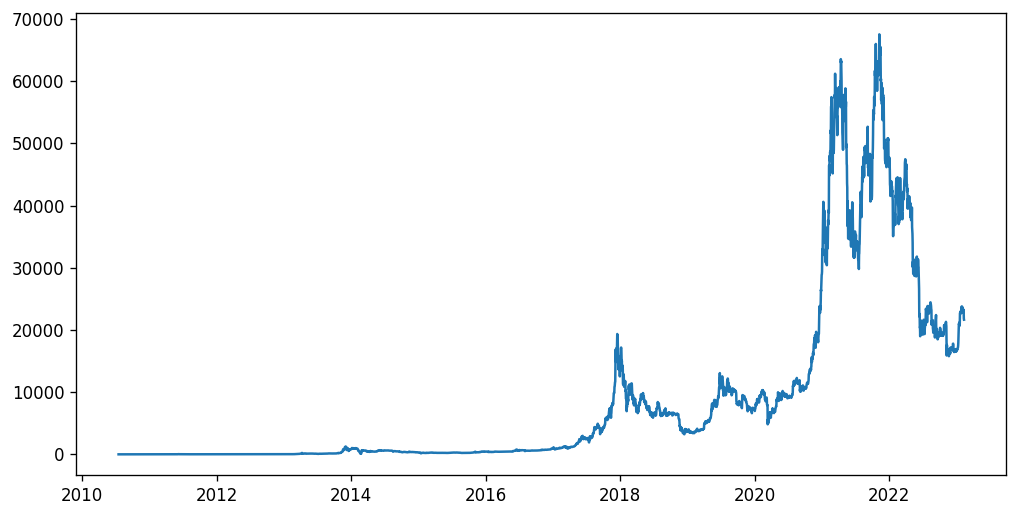

In [5]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10, 5), 'figure.dpi': 120})

# Draw chart of Bitcoin price evolution
plt.plot(df)

***

### Reduzco y grabo a CSV

In [6]:
df = df[::10].copy()
df

,price
Date,
2010-07-18,0.1
2010-07-28,0.1
2010-08-07,0.1
2010-08-17,0.1
2010-08-27,0.1
...,...
2023-01-01,16618.4
2023-01-11,17942.3
2023-01-21,22775.7


In [7]:
df.to_csv("reducido.csv")

In [8]:
df2 = pd.read_csv("reducido.csv", delimiter = ",", parse_dates=['Date'], index_col='Date')
df2

,price
Date,
2010-07-18,0.1
2010-07-28,0.1
2010-08-07,0.1
2010-08-17,0.1
2010-08-27,0.1
...,...
2023-01-01,16618.4
2023-01-11,17942.3
2023-01-21,22775.7


In [9]:
df2.dtypes

price    float64
dtype: object

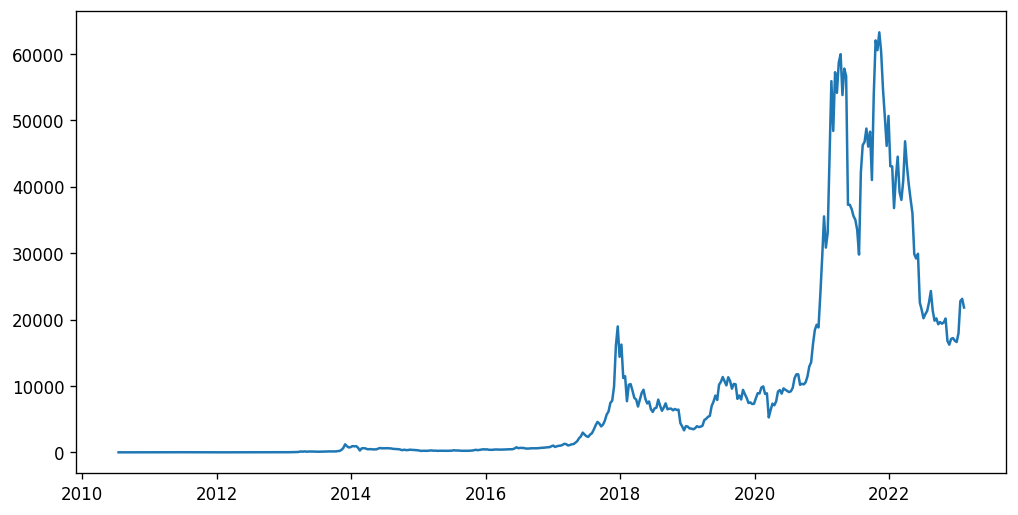

In [10]:
plt.plot(df2)